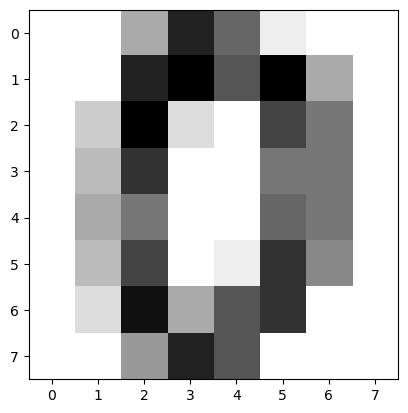

In [505]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split


digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [506]:
digits.values

<function Bunch.values>

In [507]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

<h3>#이미지 평면화</h3>

In [508]:
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

<h3>#데이터 나누기</h3>

In [509]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

In [510]:
print("X train :", X_train.shape)
print("y train :", y_train.shape)
print("X test :", X_test.shape)
print("y test :", y_test.shape)

X train : (1437, 64)
y train : (1437,)
X test : (360, 64)
y test : (360,)


<h3>#svm, rf, dt 분류에 confusion matrix 추가</h3>

In [511]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [512]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9666666666666667
[[31  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  1]
 [ 0  0 34  0  0  0  0  0  0  0]
 [ 0  0  1 35  0  1  0  0  0  1]
 [ 0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  1 38  0  0  0  0]
 [ 0  0  0  0  0  1 38  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  2]
 [ 0  1  1  0  0  0  0  0 26  1]
 [ 0  0  0  0  1  0  0  0  0 46]]


In [513]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)


In [514]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [515]:
# 테스트 데이터로 예측해본다.

y_pred = knn.predict(X_test)
# 정확도를 계산한다.

scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.9916666666666667


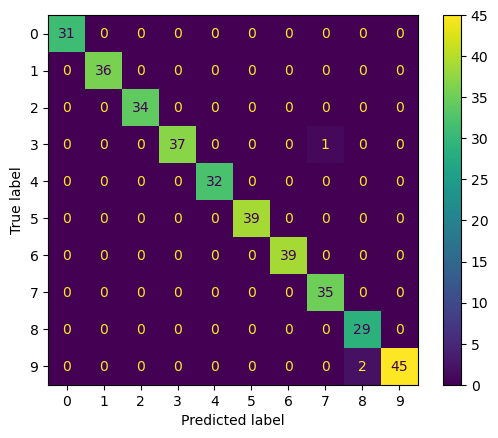

In [516]:
disp = metrics.plot_confusion_matrix(knn, X_test, y_test)
plt.show()

In [517]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))


--- SVM Classifier ---
0.9888888888888889


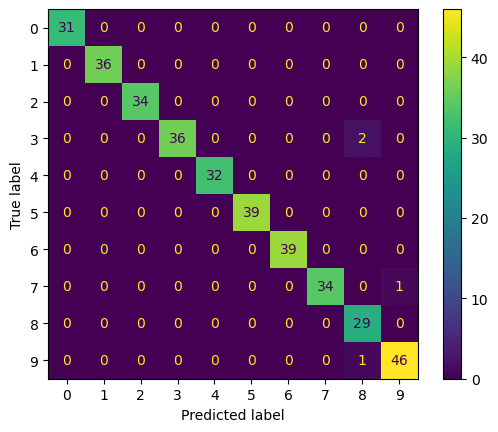

In [518]:
disp = metrics.plot_confusion_matrix(clf_svm, X_test, y_test)
plt.show()

In [519]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.8694444444444445
[[30  0  0  0  1  0  0  0  0  0]
 [ 0 32  1  0  0  0  0  0  1  2]
 [ 0  0 30  1  1  0  0  0  2  0]
 [ 0  0  0 29  1  1  0  2  3  2]
 [ 0  3  0  0 28  0  1  0  0  0]
 [ 0  2  0  0  0 35  1  0  0  1]
 [ 0  0  0  0  3  0 36  0  0  0]
 [ 0  0  1  1  0  0  0 30  2  1]
 [ 0  1  0  3  1  0  0  1 22  1]
 [ 0  1  0  1  0  2  1  0  1 41]]


In [520]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.9694444444444444
[[31  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  3  1]
 [ 0  0  0  0 31  0  0  0  0  1]
 [ 0  0  0  0  0 39  0  0  0  0]
 [ 0  1  0  0  0  1 37  0  0  0]
 [ 0  0  0  0  1  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0  0  2 45]]


<h3>#DL 수행</h3>

In [521]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1437, 64)
(1437,)
(360, 64)
(360,)


In [522]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y_train)
y2 = encoder.fit_transform(y_test)
y_train = pd.get_dummies(y1).values
y_test = pd.get_dummies(y2).values

In [523]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(64,input_shape=(64,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))##분류는 분류하고자하는 개수, 회귀는 1

model.compile(Adam(lr=0.0047),'binary_crossentropy',metrics=['accuracy'])##다중 분류 categorical_crossentropy, 두개 분류는 binary_crossentropy, 회귀는 mse

model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 64)                4160      
                                                                 
 dense_121 (Dense)           (None, 64)                4160      
                                                                 
 dense_122 (Dense)           (None, 64)                4160      
                                                                 
 dense_123 (Dense)           (None, 64)                4160      
                                                                 
 dense_124 (Dense)           (None, 10)                650       
                                                                 
Total params: 17,290
Trainable params: 17,290
Non-trainable params: 0
_________________________________________________________________


In [524]:
#fitting the model and predicting 
import numpy as np
# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=33, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/33
45/45 [==============================] - 1s 6ms/step - loss: 0.1957 - accuracy: 0.6507 - val_loss: 0.0561 - val_accuracy: 0.9083
Epoch 2/33
45/45 [==============================] - 0s 3ms/step - loss: 0.0442 - accuracy: 0.9332 - val_loss: 0.0442 - val_accuracy: 0.9528
Epoch 3/33
45/45 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9582 - val_loss: 0.0335 - val_accuracy: 0.9528
Epoch 4/33
45/45 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9610 - val_loss: 0.0287 - val_accuracy: 0.9667
Epoch 5/33
45/45 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9798 - val_loss: 0.0188 - val_accuracy: 0.9750
Epoch 6/33
45/45 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9910 - val_loss: 0.0197 - val_accuracy: 0.9750
Epoch 7/33
45/45 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 0.9930 - val_loss: 0.0160 - val_accuracy: 0.9778
Epoch 8/33
45/45 [==

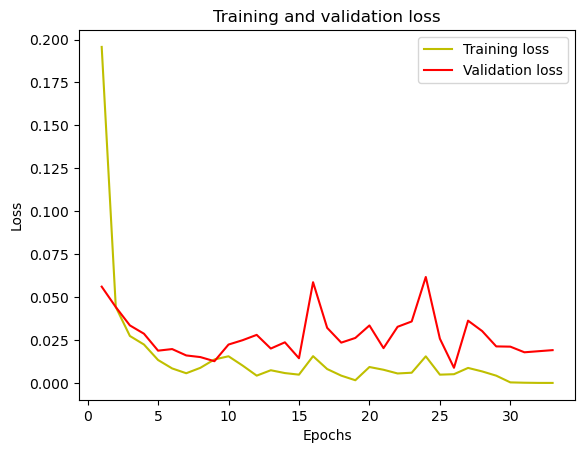

In [525]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

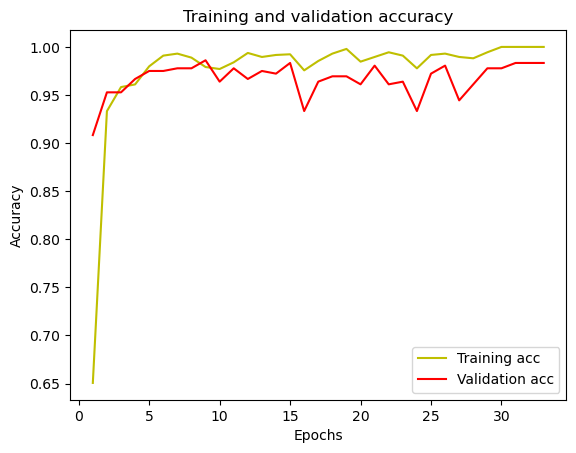

In [526]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [527]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        36
           2       0.97      1.00      0.99        34
           3       0.97      0.89      0.93        38
           4       1.00      1.00      1.00        32
           5       0.95      1.00      0.97        39
           6       1.00      1.00      1.00        39
           7       1.00      0.94      0.97        35
           8       0.97      1.00      0.98        29
           9       0.98      1.00      0.99        47

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

[[31  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0]
 [ 0  0  1 34  0  2  0  0  1  0]
 [ 0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  0]
 [ 0  0  0  0  0  0 39  0  0  0]
 [ 0  0  0